In [1]:
import sys
import os.path
import numpy as np
import pandas as pd
import wave
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
from collections import OrderedDict
from scipy import signal
from scipy.optimize import curve_fit 
from functools import wraps

# ディレクトリの絶対パスを取得
current_dir = os.path.dirname(os.path.abspath("__file__"))
# モジュールのあるパスを追加
sys.path.append( str(current_dir) + '/../../research_tools')

get_ipython().run_line_magic('matplotlib', 'inline')
%matplotlib inline

plt.rcParams['font.family'] ='IPAPGothic' #使用するフォント
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.top'] = True #x軸の目盛線の上側を表示
plt.rcParams['ytick.right'] = True #y軸の目盛線の右側を表示
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0 #軸の線幅edge linewidth。囲みの太さ
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 100 #dpiの設定
plt.rcParams['figure.subplot.hspace'] = 0.3 # 図と図の幅
plt.rcParams['figure.subplot.wspace'] = 0.3 # 図と図の幅

fig = plt.figure(figsize=(8, 11))

<Figure size 800x1100 with 0 Axes>

In [2]:
import decorators
import plot_tools
import plot_tool
import wave_process

Window Not Found


## 加工前の音声

In [3]:
wav = wave_process.wave_process("../../sample_wav/fukushima.wav")

分析対象ファイル： ../../sample_wav/fukushima.wav
チャンクサイズ： 3098892
サンプルサイズのバイト数： 2
チャンネル数： 1
wavファイルのサンプリング周波数： 48000
パラメータ :  _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=3098892, comptype='NONE', compname='not compressed')
wavファイルのデータ個数： 3098892


In [4]:
wav_row = plot_tools.PlotTools(y=wav.data[:524288], fft_N=524288, stft_N=256, fs=wav.fs, window="hamming")

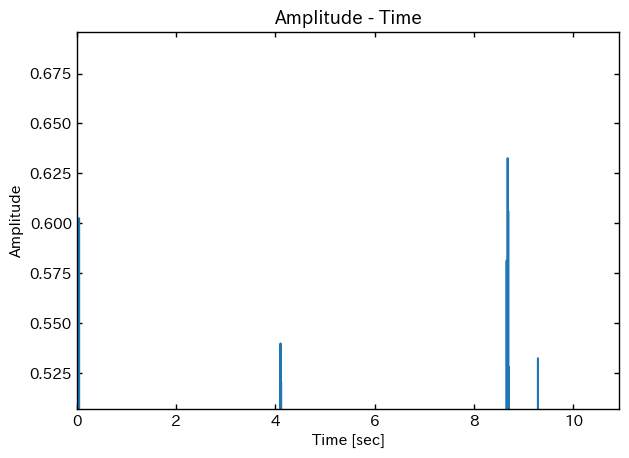

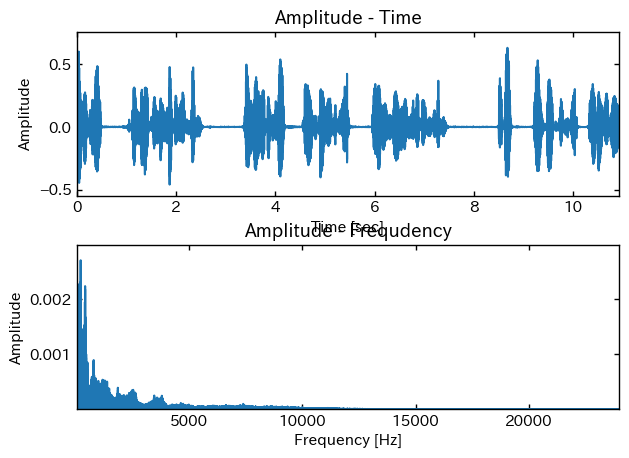

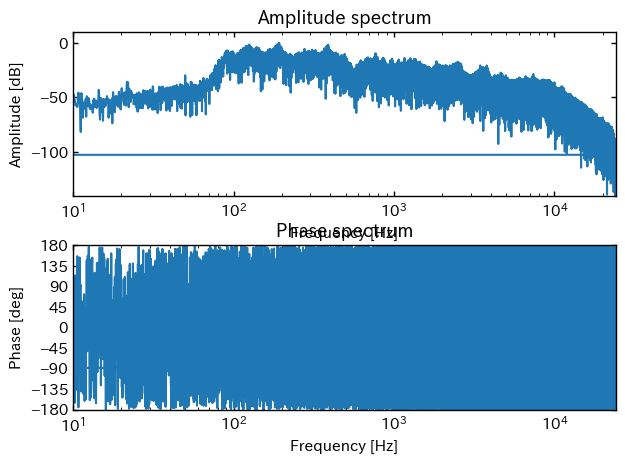

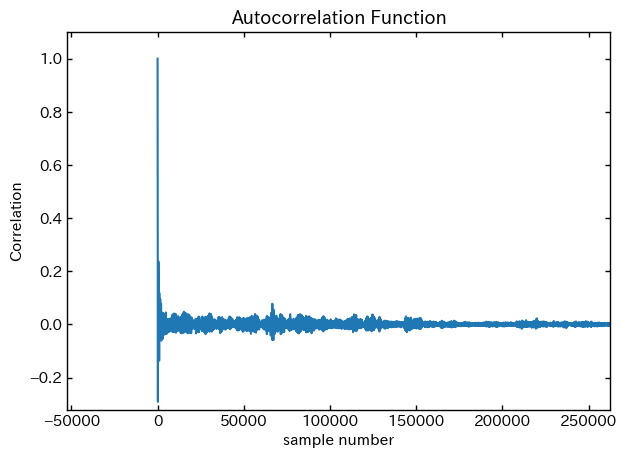

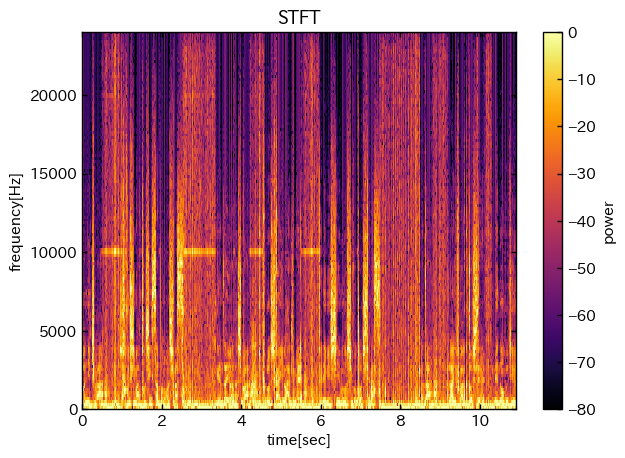

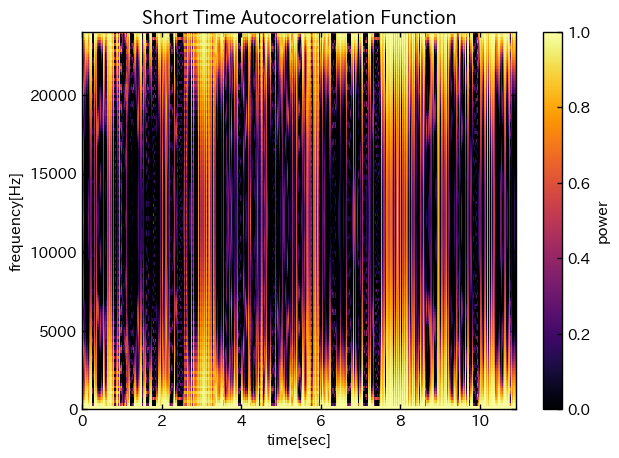

In [5]:
wav_row.plot_all()

## noise付加

In [6]:
N = 2**19  # サンプル数 528244
fs = wav.fs
dt = 1/fs            # サンプリング周期 [s]
f1, f2, f3 = 100, 1000, 3000 # 周波数 [Hz]

t = np.arange(0, N*dt, dt) # 時間 [s]
wav_noise = wav.data[:N] + 0.3 * np.sin(2*np.pi*f2*t)

In [7]:
wav.wave_write(filename="../../sample_wav/fuku_1k_noise.wav", data_array=wav_noise)

In [8]:
# BEF設計
filter2 = signal.firwin(numtaps=5001, cutoff=[950, 1050], width=None, 
                            window='hamming', pass_zero=True, 
                            scale=True, nyq=None, fs=fs)

In [9]:
wav_noise_gragh = plot_tools.PlotTools(y=wav_noise, fs=fs, fft_N=N, window="hamming")

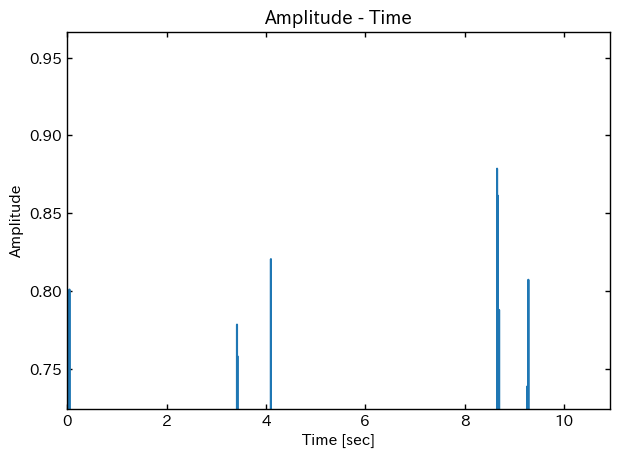

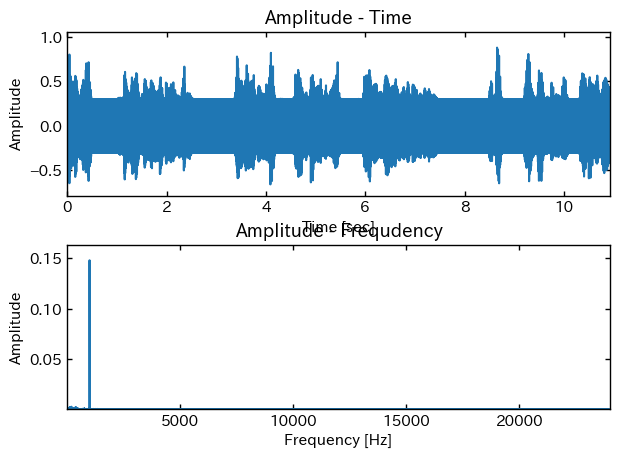

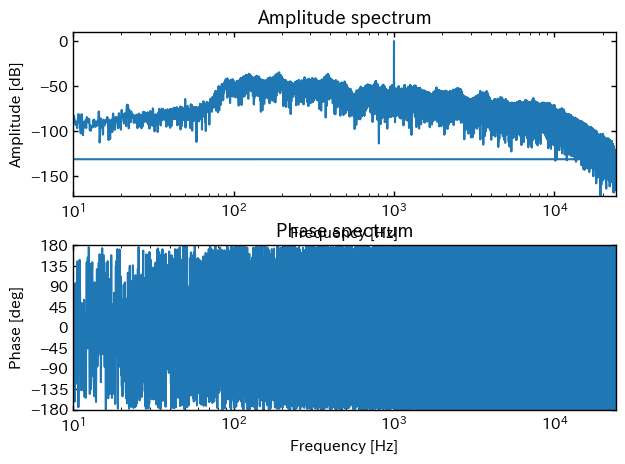

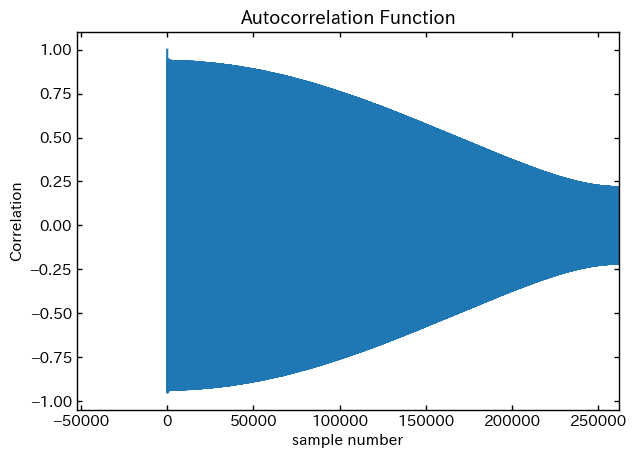

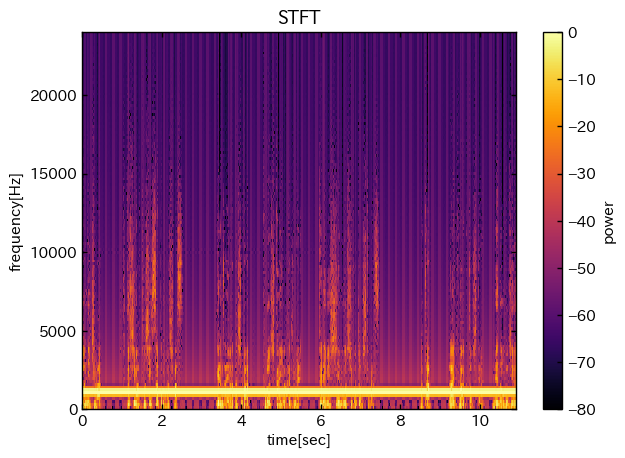

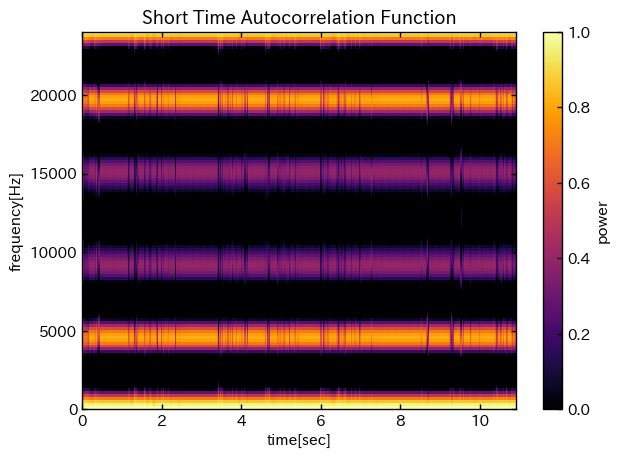

In [10]:
wav_noise_gragh.plot_all()

## フィルタ適用後

In [11]:
wav_bef_adapted = signal.lfilter(b=filter2, a=1, x=wav_noise)

In [12]:
wav_bef_adapted_graph = plot_tools.PlotTools(y=wav_bef_adapted, fs=fs, fft_N=N, window="hamming")

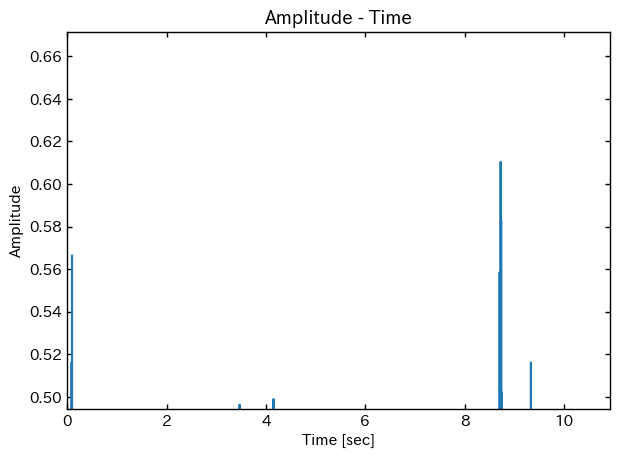

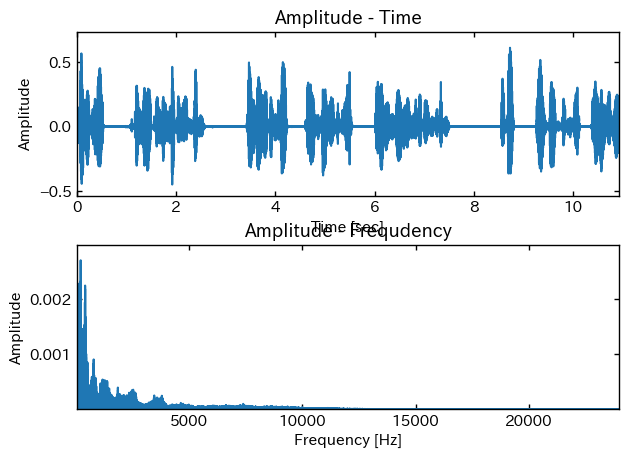

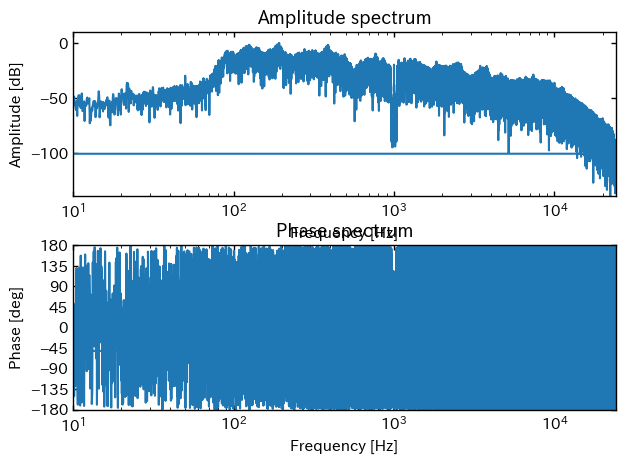

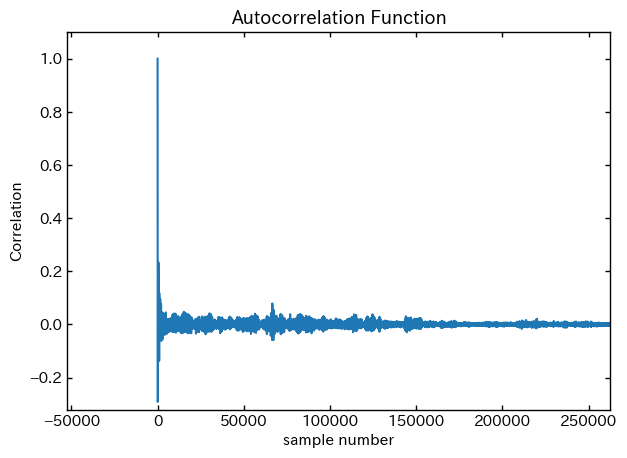

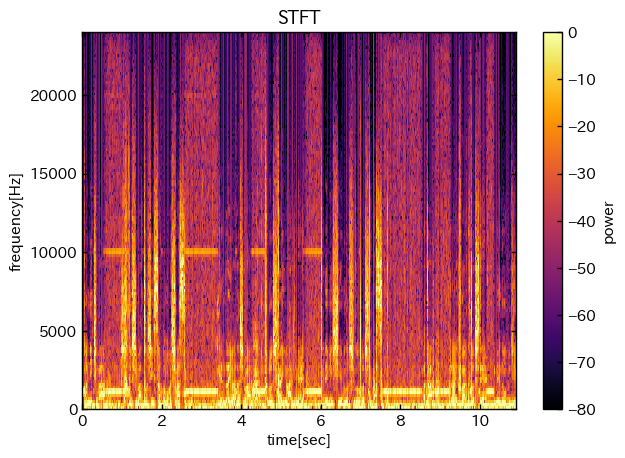

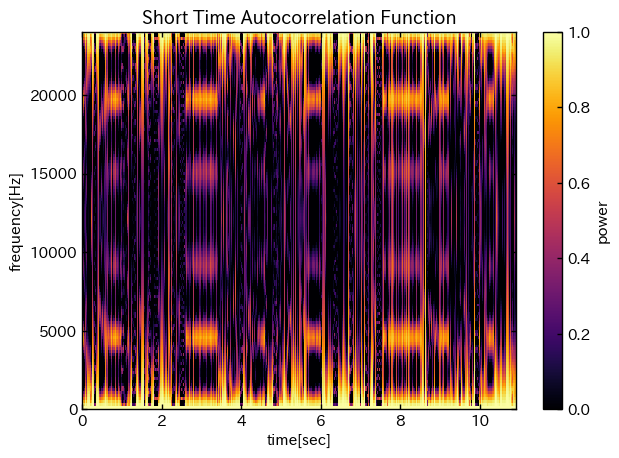

In [13]:
wav_bef_adapted_graph.plot_all()

In [14]:
wav.wave_write(filename="../../sample_wav/fuku_1k_bef_adapted.wav", data_array=wav_bef_adapted)

In [16]:
bef_cof_graph = plot_tools.PlotTools(filter2, fs=fs, fft_N=len(filter2), window="hamming")

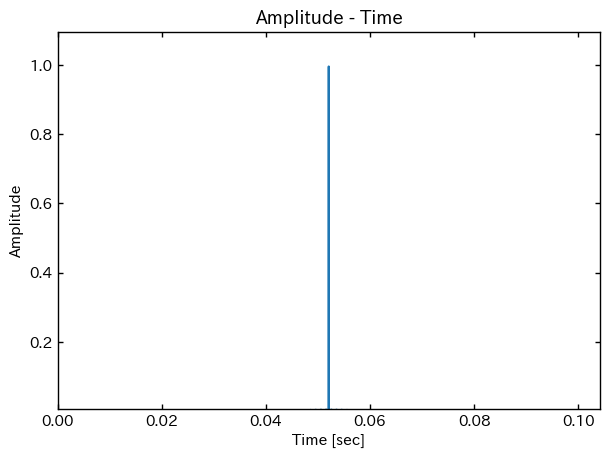

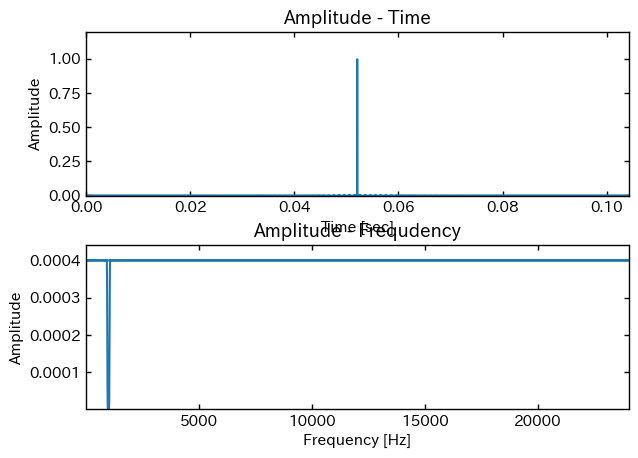

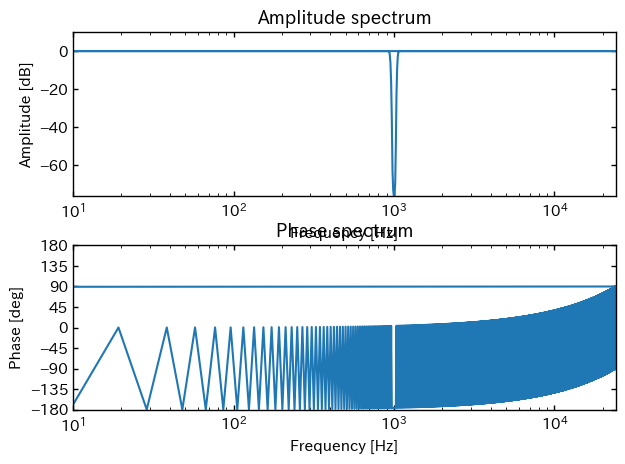

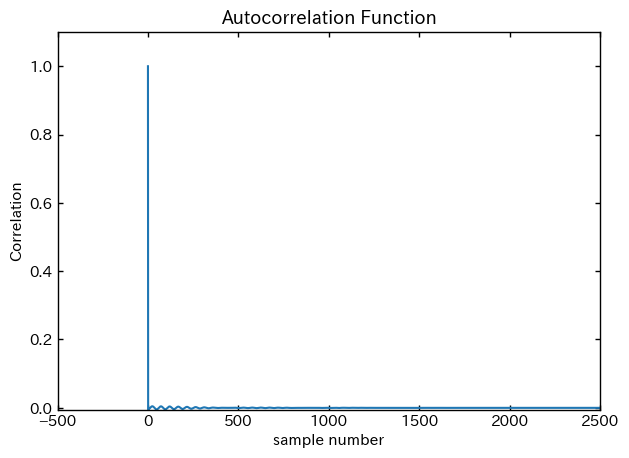

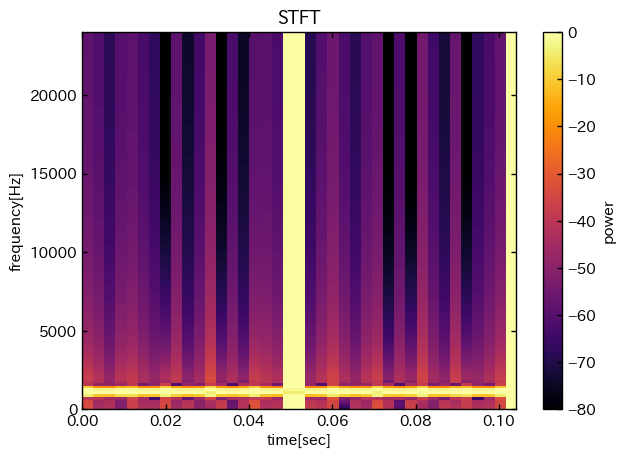

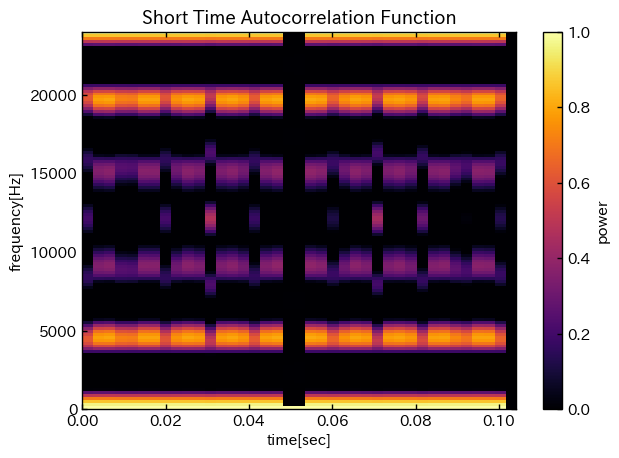

In [17]:
bef_cof_graph.plot_all()

# White Noiseに適応してみる

## White Noiseを作成

In [18]:
white_noise = np.random.rand(N)

In [19]:
white_noise.shape

(524288,)

# White Noiseをグラフ化

In [26]:
white_noise_gragh = plot_tools.PlotTools(y=white_noise, fs=fs, fft_N=N, window="hamming")

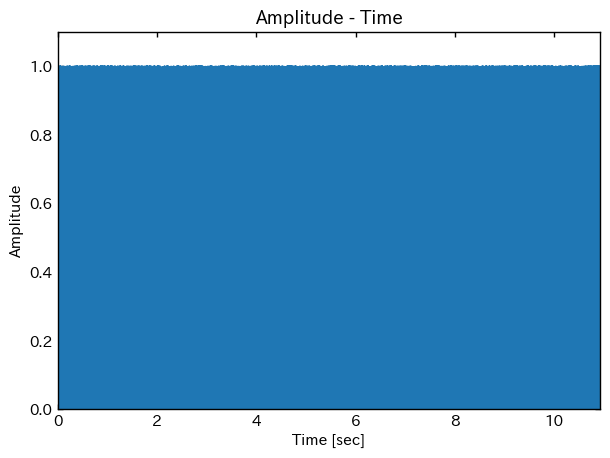

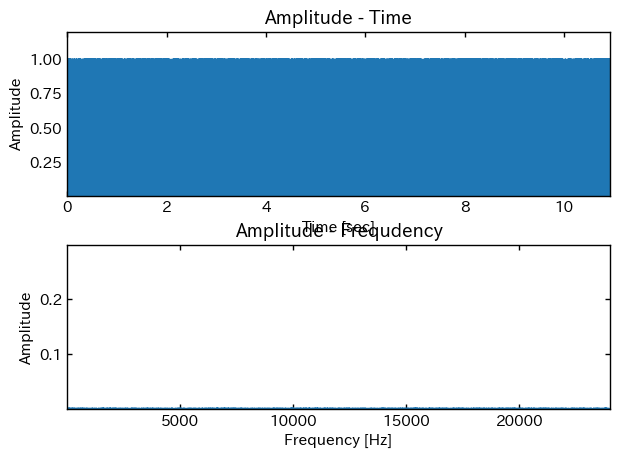

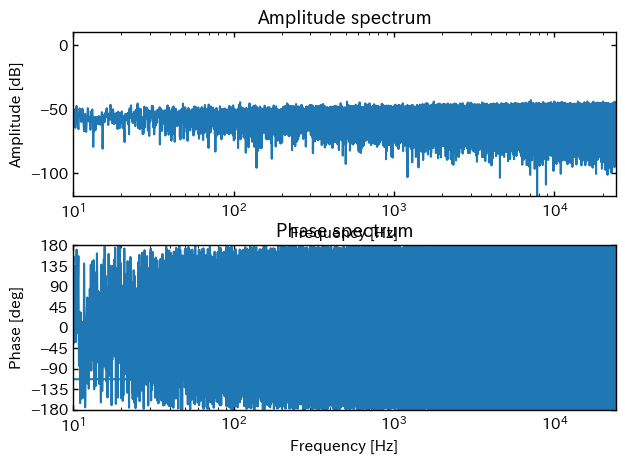

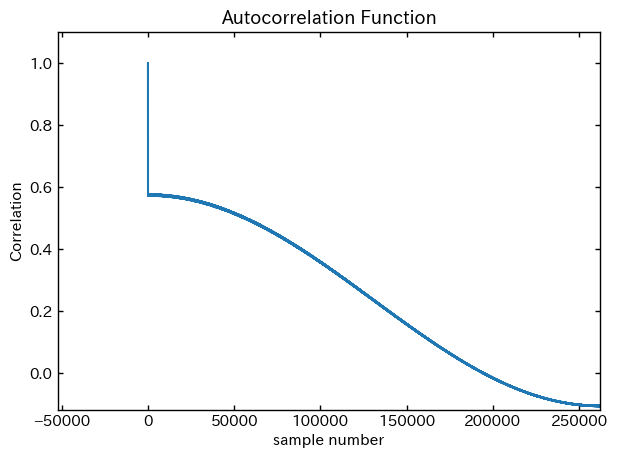

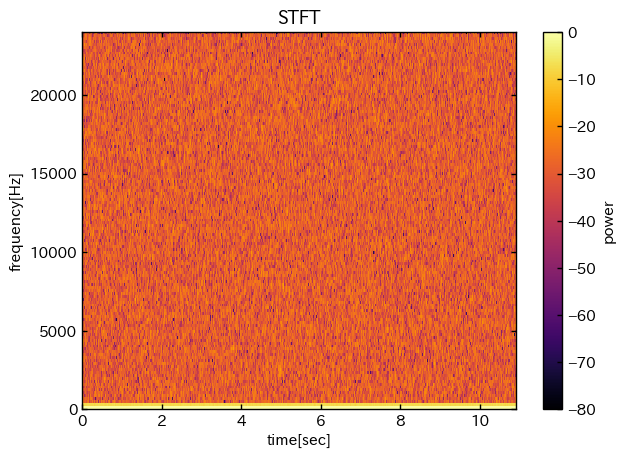

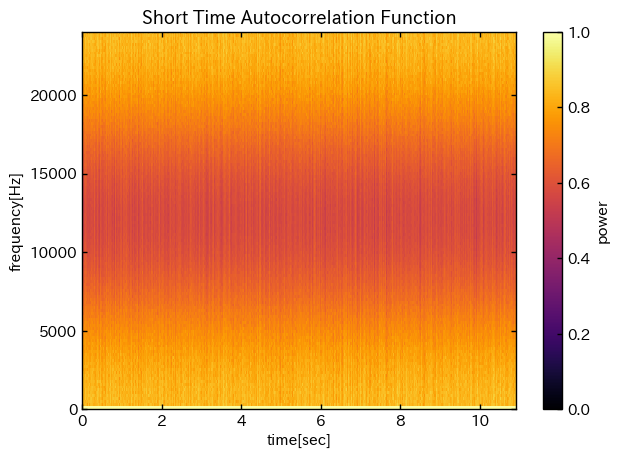

In [27]:
white_noise_gragh.plot_all()

## LPF設計 (fc = 3kHz)

In [28]:
# LPF設計 
filter3 = signal.firwin(numtaps=5001, cutoff=3000, width=None, 
                            window='hamming', pass_zero=True, 
                            scale=True, nyq=None, fs=fs)

In [29]:
white_noise_bef = signal.lfilter(b=filter3, a=1, x=white_noise)

In [31]:
white_noise_bef_gragh = plot_tools.PlotTools(y=white_noise_bef, fs=fs, fft_N=N, window="hamming")

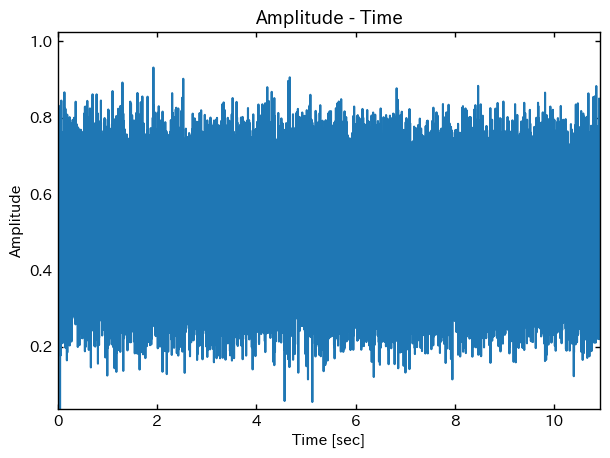

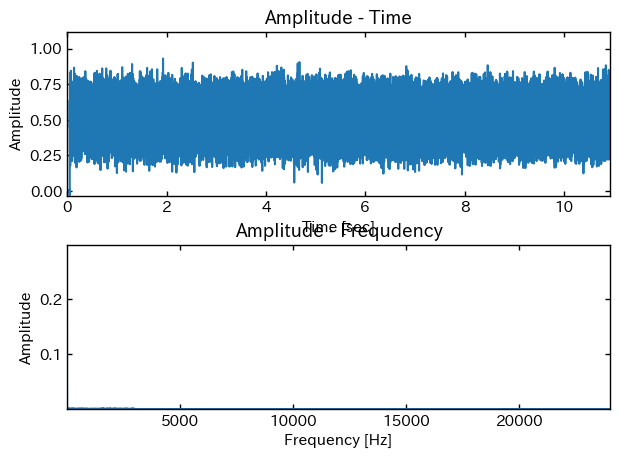

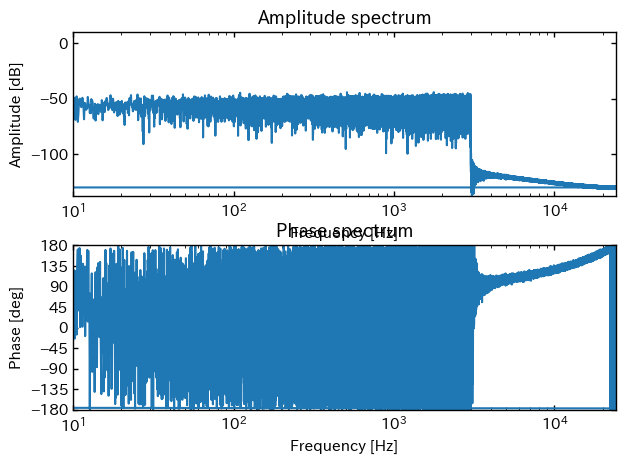

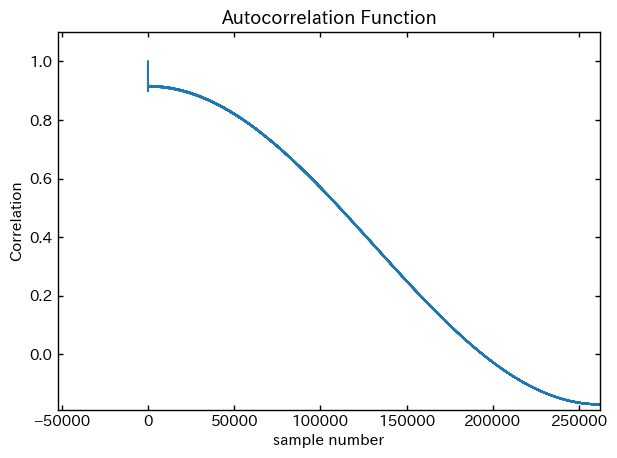

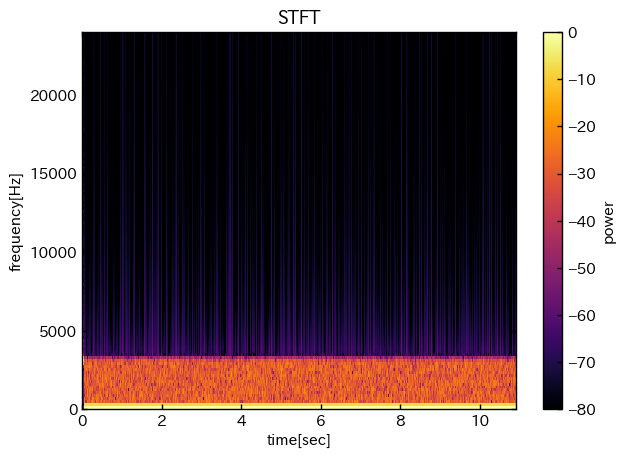

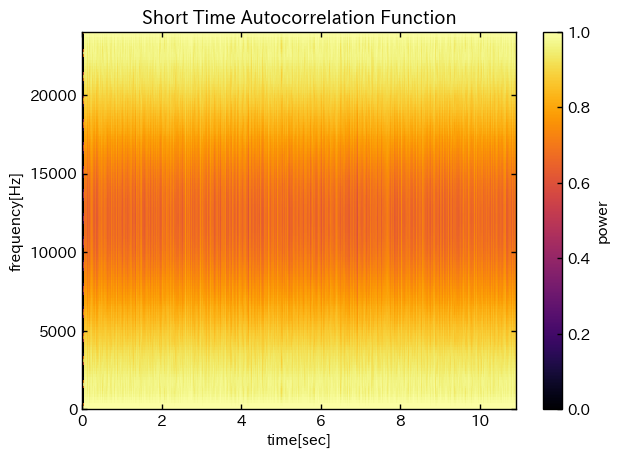

In [32]:
white_noise_bef_gragh.plot_all()

In [33]:
byte_size = 8 * 400

In [34]:
with open('/Users/tetsu/personal_files/LeapMotion/reverb_HRIR/hrir065L.DDB', "rb") as f: 
    buf = f.read(byte_size)

In [35]:
buf

b'\xd7v\xdf{\x96~\xd8\xbeN1:t\x93O\xe4>\xa7\xd0\x96\xa8\x05\xf1\x02\xbfB\x11Yb\x832\xe8\xbe\x9b +\xd7\x00\xf3\xfa\xbeq\xf1\x14Hv\x81\xf4\xbe\xafZ\x98\xcb&\xb5\xf9\xbe\x1dH\xa4b\xf0\xb7\xff\xbe\xe2\xc70\xc2\x94\xe1\xf6>T\r\x89\xeej\x85\xe4\xbe\x07\xef+C\xcb\x18\xfd>\x18\xab\x98\x82\x15Z\xfc>Y\x0e\x7f\xeb/\xbf\n?h\x15h\xb2\xd68\x0e?\x82y\xa5h\xf6H\xf1>\x88\xcfX4j\x0b\xe4>\xca\xaa\x9e\x1f\xe7\xd0\x14\xbf\xc2\xdf\xb5\x89\x8d\xbe\x12\xbf\x84Q\xdev\xb67\x14\xbf/\xf2\x19\xcf\xd8\xa3\x12\xbf\x16\xc1gP\xb4\x12\xfc\xbe\x8b\\3\xb9\xf3\xbf\t\xbf8\xac\xec\xaf\xa8\xe1\xe6\xbe\xa8\xb0\x1e\xa0\xb4\x12\xf4\xbe\xfci\xe8\xaf\xd1\x08\xf4>\xc2\xd7\x9f\xce\xce\xfb\x02?\xb5\xa4,\x99\xf0\x89\x00?O\xeb\xec\xee\xc8\xbe\x11?\x9c-\xd5\xa9\xaa\xa2\xfe>p\x92\xb1\x12\xd38\xfa>^V>\x07\xa7\r\xf5>\xc8\x06;\xb8\xb3\xd1\x00?)\xf7$/p\xd2\x0b?2\x92/\xdd\x18\xeb\x06?\xd5\xa8\xb6PKa\xfc>VF.\x95\x9c\t\xff\xbe\x82\xb1\x15\xa7\xa7\xbe\xfd\xbe#\x90\xc5:\xdeP\t\xbf\xd6\xeb"\xc85\x8f\x0c\xbfY\xa4\x08\x821\xb9\xec\xbe\xa7\xd5\xc9\x

In [38]:
angleHRTF = np.frombuffer(buf, dtype=np.float64)

In [39]:
angleHRTF = angleHRTF/ np.max(angleHRTF)

In [40]:
angleHRTF.max()

1.0

In [43]:
wav = wave_process.wave_process("../../sample_wav/fukushima.wav")

分析対象ファイル： ../../sample_wav/fukushima.wav
チャンクサイズ： 3098892
サンプルサイズのバイト数： 2
チャンネル数： 1
wavファイルのサンプリング周波数： 48000
パラメータ :  _wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=3098892, comptype='NONE', compname='not compressed')
wavファイルのデータ個数： 3098892


In [44]:
wav.data



array([ 1.43432617e-03,  1.22070312e-03,  1.22070312e-03, ...,
       -6.10351562e-05, -1.22070312e-04,  0.00000000e+00])

In [45]:
conv_angle = signal.fftconvolve(wav.data, angleHRTF)

In [46]:
wav.wave_write(filename="../../sample_wav/fuku_angle.wav", data_array=conv_angle)

In [47]:
wav_angle = wave_process.wave_process()

In [48]:
arr = []

In [49]:
for data in wav.data:
    arr.append(data)
    arr.append(data)

In [50]:
wav_angle.ch = 2

In [52]:
wav_angle.width = 2

In [68]:
# wav_angle.fs = 48000
wav_angle.fs = 24000

In [75]:
with open('/Users/tetsu/personal_files/LeapMotion/reverb_HRIR/hrir090L.DDB', "rb") as f: 
    buf = f.read(byte_size)
    

angleHRTF_L = np.frombuffer(buf, dtype=np.float64)
angleHRTF_L = angleHRTF_L/ np.max(angleHRTF_L)

In [76]:
with open('/Users/tetsu/personal_files/LeapMotion/reverb_HRIR/hrir090R.DDB', "rb") as f: 
    buf = f.read(byte_size)
    

angleHRTF_R = np.frombuffer(buf, dtype=np.float64)
angleHRTF_R = angleHRTF_R/ np.max(angleHRTF_R)

In [77]:
conv_angle_L = signal.fftconvolve(wav.data[::2], angleHRTF_L)

In [78]:
conv_angle_R = signal.fftconvolve(wav.data[1::2], angleHRTF_R)

In [83]:
arr = []
for L, R in zip(conv_angle_L, conv_angle_R):
    arr.append(L)
    arr.append(R)

In [84]:
wav_angle.wave_write(filename="../../sample_wav/fuku_angle.wav", data_array=arr)